In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import random

class HullWhite:
    def __init__(self, a1, a2, sigma1, sigma2):
        self.a1 = a1
        self.a2 = a2
        self.sigma1 = sigma1
        self.sigma2 = sigma2

    def MC_model(self, num_of_paths, iterations, x_0, y_0, rho):
        dt = 0.01
        all_paths = []

        np.random.seed(10)  # Set seed for reproducibility

        for i in range(num_of_paths):
            x = [x_0]
            y = [y_0]
            r = [x_0 + y_0]

            for j in range(iterations):
                z1 = random.gauss(0, 1)
                z2 = rho * z1 + np.sqrt(1 - rho**2) * random.gauss(0, 1)

                dx = -self.a1 * x[-1] * dt + self.sigma1 * np.sqrt(dt) * z1
                dy = -self.a2 * y[-1] * dt + self.sigma2 * np.sqrt(dt) * z2

                x.append(x[-1] + dx)
                y.append(y[-1] + dy)
                r.append(x[-1] + y[-1])

            all_paths.append(r)

        return all_paths

    def mean_path(self, all_paths):
        final_rates = [path[-1] for path in all_paths]
        return np.mean(final_rates)


In [54]:
model = HullWhite(a1 = 0.2, a2 = 2, sigma1 = 0.02, sigma2 = 0.005)
simulated_paths = model.MC_model(num_of_paths = 10, iterations = 100, x_0 = 0.01, y_0 = 0.01, rho = 0.2)
model.mean_path(simulated_paths)

0.012226930123719938

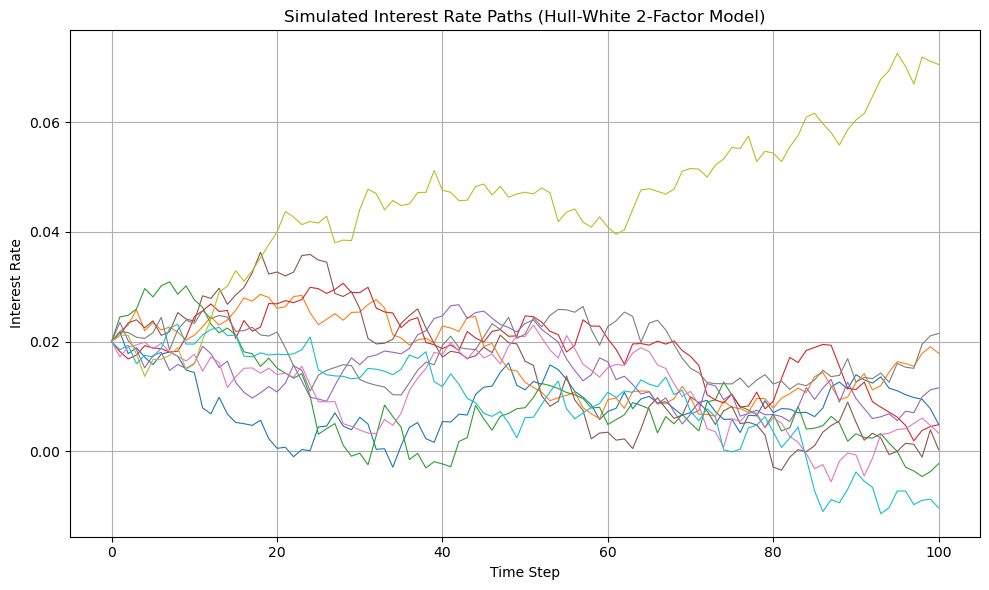

In [55]:
import matplotlib.pyplot as plt

# Assuming all_paths is a list of lists, where each inner list is a simulated path
plt.figure(figsize=(10, 6))
plt.xlabel('Time Step')
plt.ylabel('Interest Rate')
plt.title('Simulated Interest Rate Paths (Hull-White 2-Factor Model)')

for path in simulated_paths:
    plt.plot(path, linewidth=0.8)

plt.grid(True)
plt.tight_layout()
plt.show()
